# MODELO ADALINE [ADAptive LInear NEuron]

Solução de problemas linearmente separáveis que faz uso de:
- Função custo [Soma de erros quadráticos]
- Otimização x método do gradiente descendente

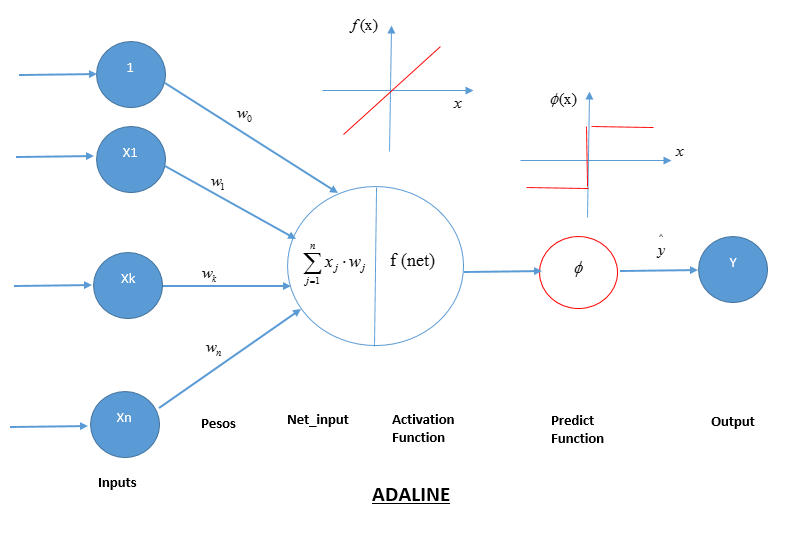

In [1]:
from IPython.display import Image
Image('img/ada1.png')

## Formulação matemática do Adaline 

Seja 'm' amostras de dados e 'n' caraterísticas analizadas, determina-se uma função custo para cada Epoch:

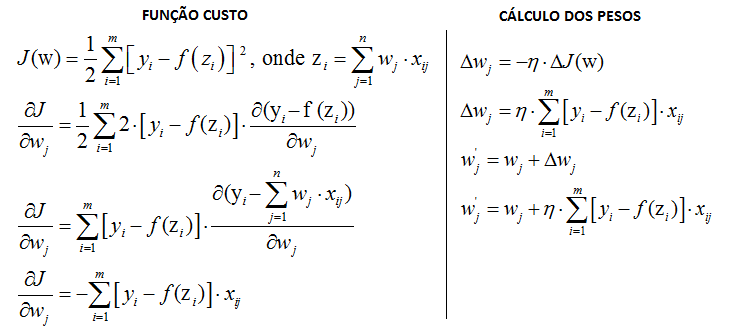

In [2]:
Image('img/ada2.png')

Estruturas de dados envolvidas no Neuronio Adaline

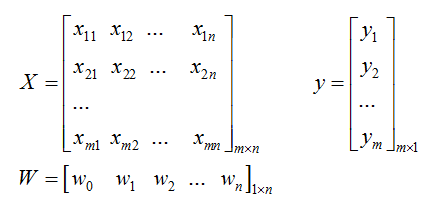

In [3]:
Image('img/ada3.png')

## Implementação da classe Adaline

In [4]:
import numpy as np

In [5]:
class Adaline(object):
    
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
    
    def inicialize_attr(self, x):
        self.w_ = np.zeros(1 + x.shape[1])
        self.cost_ = []
    
    def fit(self, x, y):
        self.inicialize_attr(x)
        for i in range(self.n_iter):
            output = self.f_net(x)
            erros = y - output
            self.w_[0] += self.eta * erros.sum()
            self.w_[1:] += self.eta * x.T.dot(erros)
            custo = (erros**2).sum()/2.0
            self.cost_.append(custo)
        return self
            
    def input_net(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def f_net(self, x):
        return self.input_net(x)
    
    def predict(self, x):
        return np.where(self.f_net(x)>=0, 1, -1)


## Preprocessamento do dataset Iris

In [6]:
import pandas as pd
dataset = pd.read_csv('dataset/iris.data.txt', header = None)

In [7]:
#selecionamos 100 primeiros dados [classes setosa(-1) e versicolor(+1)]
#features 0, 2 [petal-length, sepal-length]
x = dataset.iloc[0:100, [0,2]].values
y = dataset.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [8]:
x, y

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4],
        [5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5],
        [5.4, 1.5],
        [4.8, 1.6],
        [4.8, 1.4],
        [4.3, 1.1],
        [5.8, 1.2],
        [5.7, 1.5],
        [5.4, 1.3],
        [5.1, 1.4],
        [5.7, 1.7],
        [5.1, 1.5],
        [5.4, 1.7],
        [5.1, 1.5],
        [4.6, 1. ],
        [5.1, 1.7],
        [4.8, 1.9],
        [5. , 1.6],
        [5. , 1.6],
        [5.2, 1.5],
        [5.2, 1.4],
        [4.7, 1.6],
        [4.8, 1.6],
        [5.4, 1.5],
        [5.2, 1.5],
        [5.5, 1.4],
        [4.9, 1.5],
        [5. , 1.2],
        [5.5, 1.3],
        [4.9, 1.5],
        [4.4, 1.3],
        [5.1, 1.5],
        [5. , 1.3],
        [4.5, 1.3],
        [4.4, 1.3],
        [5. , 1.6],
        [5.1, 1.9],
        [4.8, 1.4],
        [5.1, 1.6],
        [4.6, 1.4],
        [5.3, 1.5],
        [5. , 1.4],


## Fase de treinamento  

Análise da convergência da Adaline : função custo vs. número de Epochs  

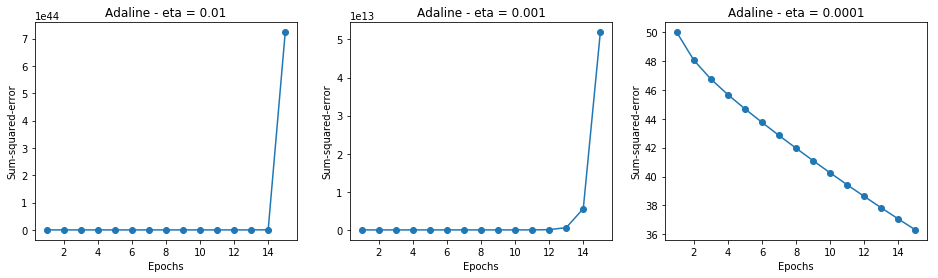

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
etas = [0.01, 0.001, 0.0001]
for i in range(3):
    ada = Adaline(eta = etas[i], n_iter = 15).fit(x, y)
    ax[i].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Sum-squared-error')
    ax[i].set_title('Adaline - eta = ' + str(etas[i]))
plt.show()

## Convergência do gradiente descendente usando StandardScaler < Normalização>

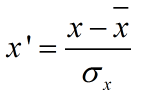

In [10]:
Image('img/ada4.png')

In [11]:
x_std = np.copy(x)
x_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / (x[:, 0].std())
x_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / (x[:, 1].std())

Treinamento do Neurônio Adaline para dados normalizados

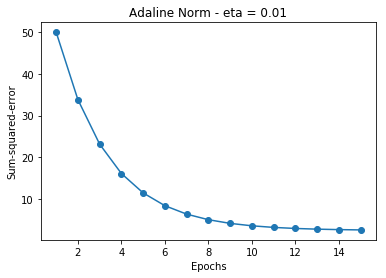

In [12]:
ada_norm = Adaline(eta = 0.01, n_iter = 15).fit(x_std, y)
plt.plot(range(1, len(ada_norm.cost_) + 1), ada_norm.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline Norm - eta = 0.01')
plt.show()

Visualização da fronteira de decisão

In [13]:
from matplotlib.colors import ListedColormap
                
def plot_decision_regions(x, y, classifier, resolution = 0.1):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot superficie de decisao
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))                          
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.5, cmap = cmap)                                        
    plt.xlim(xx1.min(), xx1.max())                                        
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(x[y == classe, 0], x[y == classe, 1], alpha = 0.8, 
                    color = cmap(idx), marker = markers[idx], label = classe)                


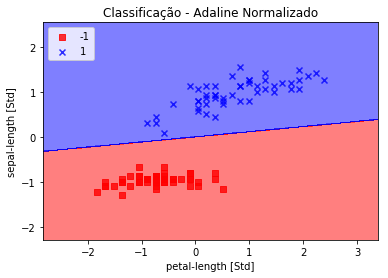

In [14]:
plot_decision_regions(x_std, y, classifier = ada_norm, resolution = 0.01)
plt.title('Classificação - Adaline Normalizado')
plt.xlabel('petal-length [Std]')
plt.ylabel('sepal-length [Std]')
plt.legend(loc = 'upper left')
plt.show()